In [64]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer as SIA
import pandas as pd
import praw
import pprint
import matplotlib.pyplot as plt

In [65]:
sia = SIA()
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Adria\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Get Headlines From Reddit

In [66]:
user_agent = "Scraper"
reddit = praw.Reddit(
    client_id = "aKfBu6Agrx3kW_ElCYh5nA",
    client_secret = "Ngao_Oo_eW8DFPy0qzjFhi5qSoBDHg",
    user_agent = user_agent
)

headlines = set()
for submission in reddit.subreddit('politics').hot(limit=None):
    headlines.add(submission.title)

for submission in reddit.subreddit('news').hot(limit=None):
    headlines.add(submission.title)

for submission in reddit.subreddit('worldnews').hot(limit=None):
    headlines.add(submission.title)
    
print(len(headlines))

1495


In [67]:
df = pd.DataFrame(headlines)
df.head()

,0
0,Finland will be self-sufficient in electricity within a ...
1,All The People Who Trump Tried To Make The Feds Investig...
2,Stand Your Ground Laws Are Proliferating. And More Peopl...
3,"Premier League, WSL and EFL weekend games off but other ..."
4,Researchers discover how air pollution leads to cancer b...


In [68]:
df.to_csv('headlines.csv', header = False, encoding = 'utf-8', index = False)

Perform Sentiment Analysis

In [69]:
results = []

for line in headlines:
    polarity_score = sia.polarity_scores(line)   #Outputs dict
    polarity_score['headline'] = line
    results.append(polarity_score)

print(results[0:3])

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'headline': 'Finland will be self-sufficient in electricity within a year or two, says minister'}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'headline': 'All The People Who Trump Tried To Make The Feds Investigate For Being Mean To Him'}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'headline': 'Stand Your Ground Laws Are Proliferating. And More People Are Dying.'}]


In [70]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.00,1.00,0.0,0.0000,Finland will be self-sufficient in electricity within a ...
1,0.00,1.00,0.0,0.0000,All The People Who Trump Tried To Make The Feds Investig...
2,0.00,1.00,0.0,0.0000,Stand Your Ground Laws Are Proliferating. And More Peopl...
3,0.00,1.00,0.0,0.0000,"Premier League, WSL and EFL weekend games off but other ..."
4,0.45,0.55,0.0,-0.9313,Researchers discover how air pollution leads to cancer b...


Label and Create new CSV File

In [71]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < 0.2, 'label'] = -1
df.loc[df['compound'] == 0, 'label'] = 0
df.head()

,neg,neu,pos,compound,headline,label
0,0.00,1.00,0.0,0.0000,Finland will be self-sufficient in electricity within a ...,0
1,0.00,1.00,0.0,0.0000,All The People Who Trump Tried To Make The Feds Investig...,0
2,0.00,1.00,0.0,0.0000,Stand Your Ground Laws Are Proliferating. And More Peopl...,0
3,0.00,1.00,0.0,0.0000,"Premier League, WSL and EFL weekend games off but other ...",0
4,0.45,0.55,0.0,-0.9313,Researchers discover how air pollution leads to cancer b...,-1


In [72]:
df2 = df[['label', 'headline']]
df2.head()
df2.to_csv('Labeled_Headlines.csv', header = False, encoding = 'utf-8', index = False)

Practical Examples

In [73]:
# Check how many headlines are positive, negative and neutral
df2['label'].value_counts(-1)*100

-1    49.230769
 0    31.438127
 1    19.331104
Name: label, dtype: float64

In [74]:
# Print the bad and good headlines

pp = pprint.PrettyPrinter(indent=4)
print('Good Headlines \n')
pp.pprint(list(df2.query('label == 1')['headline'])[:5])

print('\nBad Headlines \n')
pp.pprint(list(df2.query('label == -1')['headline'])[:5])

Good Headlines 

[   'Guns bought through credit cards in the US will now be trackable',
    'Russia’s Putin to meet Indian PM Modi to boost trade ties',
    "The US announced sanctions on Iran's Ministry of Intelligence and "
    'Security and its minister Esmail Khatib, after Tehran was identified as '
    'being behind an unprecedented cyberattack against NATO ally Albania',
    'Why A State Like Michigan Might Actually Be A Blue State',
    "Russia plays up China's support as it retreats in Ukraine"]

Bad Headlines 

[   'Researchers discover how air pollution leads to cancer by activating '
    'damaged cells - drugs to stop cancer forming may now be possible',
    'Harris says internal threats to democracy fuel questions of U.S. values',
    'Republicans Introduce Bill To Ban Abortion Nationwide After 15 Weeks',
    'Bodies of more civilians murdered by the Russians found in liberated '
    'Kharkiv oblast village',
    "Graham's abortion ban stuns Senate GOP | His past, less con

[736, 470, 289]


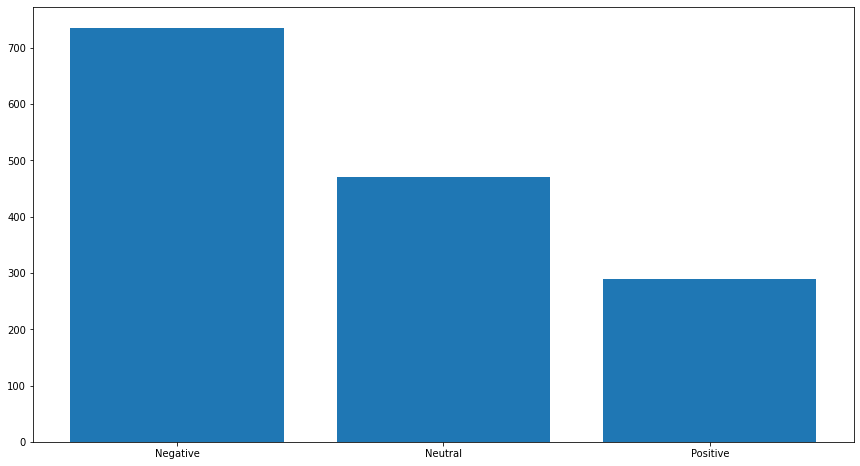

In [75]:
# Create a Bar Chart

fig, ax = plt.subplots(figsize = (50, 8))
categories = ['Negative', 'Neutral', 'Positive']
values = [0]*3
for label in df2['label']:
    if label == -1:
        values[0] += 1
    if label == 0:
        values[1] += 1
    if label == 1:
        values[2] += 1

print(values)
plt.title('Headline Labels')
plt.subplot(131)
plt.bar(categories, values)

plt.show()